# Current version : 9.C (2025-04-29)

# Libraries and directory (always run)

In [1]:
### import necessary libraries
from datetime import datetime
# import geopandas as gpd
# from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import numpy as np
import os
import pandas as pd
import seaborn as sns
import scanpy as sc
import random
from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
# from sklearn.neighbors import NearestNeighbors
# from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore") 
sc.logging.print_header()
# sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

start_time = datetime.now()

def print_with_elapsed_time(message):
    elapsed_time = datetime.now() - start_time
    elapsed_seconds = elapsed_time.total_seconds()
    print(f"[{elapsed_seconds:.2f} seconds] {message}")

scanpy==1.9.3 anndata==0.9.1 umap==0.5.7 numpy==1.24.1 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.14.3 pynndescent==0.5.13


In [2]:
# print(f"geopandas version: {gpd.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scanpy version: {sc.__version__}")
# print(f"plt version: {plt.__version__}")

pandas version: 1.5.3
scanpy version: 1.9.3


In [3]:
### Directory where the data is stored

# dir = "/mnt/d/Xenium" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data/k5" #Ubuntu
# dir = "D:\\Xenium"

# dir_notebook = '/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook'
dir_notebook = '/media/volume/volume_spatial/hugo/notebook'
# dir_notebook = 'D:\\Jupyter_notebook/Xenium_jupyter_notebook'
dir_notebook = './'

In [4]:
# # # ### HC ###

# # # # # circa1
# samples = ['circa1_ZT1','circa1_ZT5','circa1_ZT9','circa1_ZT13','circa1_ZT17','circa1_ZT21']
# samples_ids = ['circa1-ZT1','circa1-ZT5','circa1-ZT9','circa1-ZT13','circa1-ZT17','circa1-ZT21',]
# name_dir = 'circa1'

# # ### circa2_
# samples = ['circa2_ZT1','circa2_ZT5','circa2_ZT9','circa2_ZT13','circa2_ZT17','circa2_ZT21']
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',]
# name_dir = 'circa2'

# # # # # ### ALL SAMPLES Run1-3
samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855",
           "3160-1__20240321__212855", "3160-2__20240321__212855","3159-2__20240530__205547", "3161-1__20240530__205547",
          "3159-3__20240530__205547", "3161-2__20240530__205547","3159-4__20240530__205547","3161-3__20240530__205547"]

samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1",
               "3160-1", "3160-2","3159-2", "3161-1",
              "3159-3","3161-2","3159-4", "3161-3"
              ]
name_dir = 'all-samples'

# # ### circa4-Salk
# # samples = ['circa4-Salk-ZT01',
# #            'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
# #            'circa4-Salk-ZT21',]
# # samples_ids = ['circa4-Salk-ZT01',
# #                'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
# #                'circa4-Salk-ZT21',]
# # name_dir = 'circa4-Salk'


# ## circa4-IGM
# samples_ids = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# samples = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# name_dir = 'circa4-IGM'


### All 5k
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
#             'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#             'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#             'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#             'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                 ]
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
#             'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#             'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#             'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#             'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                ]
# name_dir = 'circa'


# Data import

In [5]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

adata = sc.read_h5ad(f"{dir_notebook}/data/{name_dir}/{name_dir}_final.h5ad.gz")

In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

In [ ]:
adata.write_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

In [ ]:
adata.obs.groupby('cell_type_final')['circascore'].mean().sort_values()

In [ ]:
plt.boxplot(x=adata.obs['circascore'])

In [ ]:
# adata2 = adata[adata.obs['cell_type_final'] == 'Microglia']
cont_tab = pd.crosstab(adata.obs['region_automap_name'], adata.obs['circascore'], normalize="columns")

In [ ]:
# plt.figure(figsize=(20,20))
sns.heatmap(cont_tab, annot=True, cmap="YlGnBu", fmt=".1f")

In [ ]:
adata.obs['region_automap_name'].value_counts()

# Visualization

## UMAP

In [ ]:
adata.obs[adata.obs['cell_type_final']=='L6 CT CTX Glut']['mmc:class_name'].unique()

In [ ]:
if 'reduced_pc_20_umap' not in adata.obsm.keys():
    adata.obsm['reduced_pc_20_umap'] = adata.obsm['X_umap']

In [ ]:
from module.dataviz_analysis import umap_plot_indi_multi

umap_plot_indi_multi(adata,
                     cluster_to_use = "cell_type_newnum_final",
                     individual_plot = False,
                     save_plot = True,
                     cmap_ = 'tab20',
                     )

In [ ]:
### UMAP plot with gene expression as color scale
 
sc.pl.umap(adata, color=["Vip"], vmin = 0)

#### 3D Umap ###TODO: confirm it works

In [ ]:
start_time = datetime.now()
sc.tl.umap(adata, min_dist= 1, n_components=3)
print_with_elapsed_time(f"umap done")
sc.pl.umap(adata, projection='3d')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

adata.obs['umap-1'] = adata.obsm['X_umap'][:, 0]
adata.obs['umap-2'] = adata.obsm['X_umap'][:, 1]
adata.obs['umap-3'] = adata.obsm['X_umap'][:, 2]

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')


ax.scatter(adata.obs['umap-1'], adata.obs['umap-2'], adata.obs['umap-3'], c = adata.obs['leiden_colors'], s=0.5, label=adata.obs['cell_type_final'])

ax.legend()
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


In [ ]:
cluster_centroids = adata.obs.groupby(cluster_to_use)[['umap-1', 'umap-2','umap3']].median()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

adata.obs['umap-1'] = adata.obsm['X_umap'][:, 0]
adata.obs['umap-2'] = adata.obsm['X_umap'][:, 1]
adata.obs['umap-3'] = adata.obsm['X_umap'][:, 2]

cluster_centroids = adata.obs.groupby('cell_type_newnum_final')[['umap-1', 'umap-2','umap-3']].median()

cell_type_unique = adata.obs['cell_type_final'].unique()

fig, ax = plt.subplots(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

for idx, celltype in enumerate(cell_type_unique):
    adata_sel = adata[(adata.obs[cluster_to_use] == celltype)]
    ratio_ = int(len(adata_sel.obs['cell_id']) / 100)
    adata_sel = adata_sel[0:ratio_]
    celltype_combine = str(idx) +'_' + str(celltype)
    ax.scatter(adata_sel.obs['umap-1'], adata_sel.obs['umap-2'], adata_sel.obs['umap-3'], s=3, c=adata_sel.obs['leiden_colors'], label = celltype_combine)
for cluster_id, centroid in cluster_centroids.iterrows():
    ax.text(centroid['umap-1'], centroid['umap-2'], centroid['umap-3'], str(cluster_id), color='red', fontsize=20, ha = 'center')

plt.legend(markerscale=5, scatterpoints=10, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# if save_plot == True:
#     plt.savefig(f"plot/{name_dir}/{name_dir}_UMAP_all.png")



# fig = plt.figure(figsize=(20,20))
# ax = fig.add_subplot(projection='3d')

# ax.scatter(adata.obs['umap-1'], adata.obs['umap-2'], adata.obs['umap-3'], c = adata.obs['leiden_colors'], s=0.5, label=adata.obs['cell_type_final'])
# ax.legend()
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

## Cluster plot

In [10]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,sample,batch,mmc:class_name,mmc:class_correlation_coefficient,mmc:subclass_name,mmc:supertype_name,cell_type_newnum_final,cell_type_final,region_automap_name,region_automap_num,Genotype,ZT,leiden_colors
3159-2_aaafgdph-1,3159-2_aaafgdph-1,4239.397949,767.431824,413.0,3159-2,0,14 HY Glut,0.6543,128 VMH Fezf1 Glut,0565 VMH Fezf1 Glut_3,0,VMH Glut,VMH,0,WT,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3159-2_aaafklkf-1,3159-2_aaafklkf-1,4322.928711,756.468445,174.0,3159-2,0,14 HY Glut,0.6640,128 VMH Fezf1 Glut,0563 VMH Fezf1 Glut_1,0,VMH Glut,VMH,0,WT,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3159-2_aaafoceb-1,3159-2_aaafoceb-1,4321.172852,632.988159,320.0,3159-2,0,14 HY Glut,0.6560,128 VMH Fezf1 Glut,0563 VMH Fezf1 Glut_1,1,HY GABA,VMH,0,WT,ZT17,"(0.6823529411764706, 0.7803921568627451, 0.909..."
3159-2_aaahjcea-1,3159-2_aaahjcea-1,4317.106934,639.748474,155.0,3159-2,0,08 CNU-MGE GABA,0.6207,057 NDB-SI-MA-STRv Lhx8 Gaba,0244 NDB-SI-MA-STRv Lhx8 Gaba_1,1,HY GABA,VMH,0,WT,ZT17,"(0.6823529411764706, 0.7803921568627451, 0.909..."
3159-2_aaaingne-1,3159-2_aaaingne-1,4323.405762,886.085266,60.0,3159-2,0,14 HY Glut,0.5495,129 VMH Nr5a1 Glut,0568 VMH Nr5a1 Glut_3,0,VMH Glut,VMH,0,WT,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3161-2_oipbmooh-1,3161-2_oipbmooh-1,6047.291504,4210.255371,202.0,3161-2,3,04 DG-IMN Glut,0.7101,037 DG Glut,0137 DG Glut_2,40,DG Glut,HIPP,13,APP,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3161-2_oipcaopf-1,3161-2_oipcaopf-1,6041.953125,4213.354004,126.0,3161-2,3,04 DG-IMN Glut,0.7305,037 DG Glut,0137 DG Glut_2,40,DG Glut,HIPP,13,APP,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3161-2_oipcdknj-1,3161-2_oipcdknj-1,6033.910156,4210.541504,257.0,3161-2,3,04 DG-IMN Glut,0.7608,037 DG Glut,0137 DG Glut_2,40,DG Glut,HIPP,13,APP,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."
3161-2_oipcmabp-1,3161-2_oipcmabp-1,6033.475098,4203.499023,132.0,3161-2,3,04 DG-IMN Glut,0.7202,037 DG Glut,0137 DG Glut_2,40,DG Glut,HIPP,13,APP,ZT17,"(0.12156862745098039, 0.4666666666666667, 0.70..."


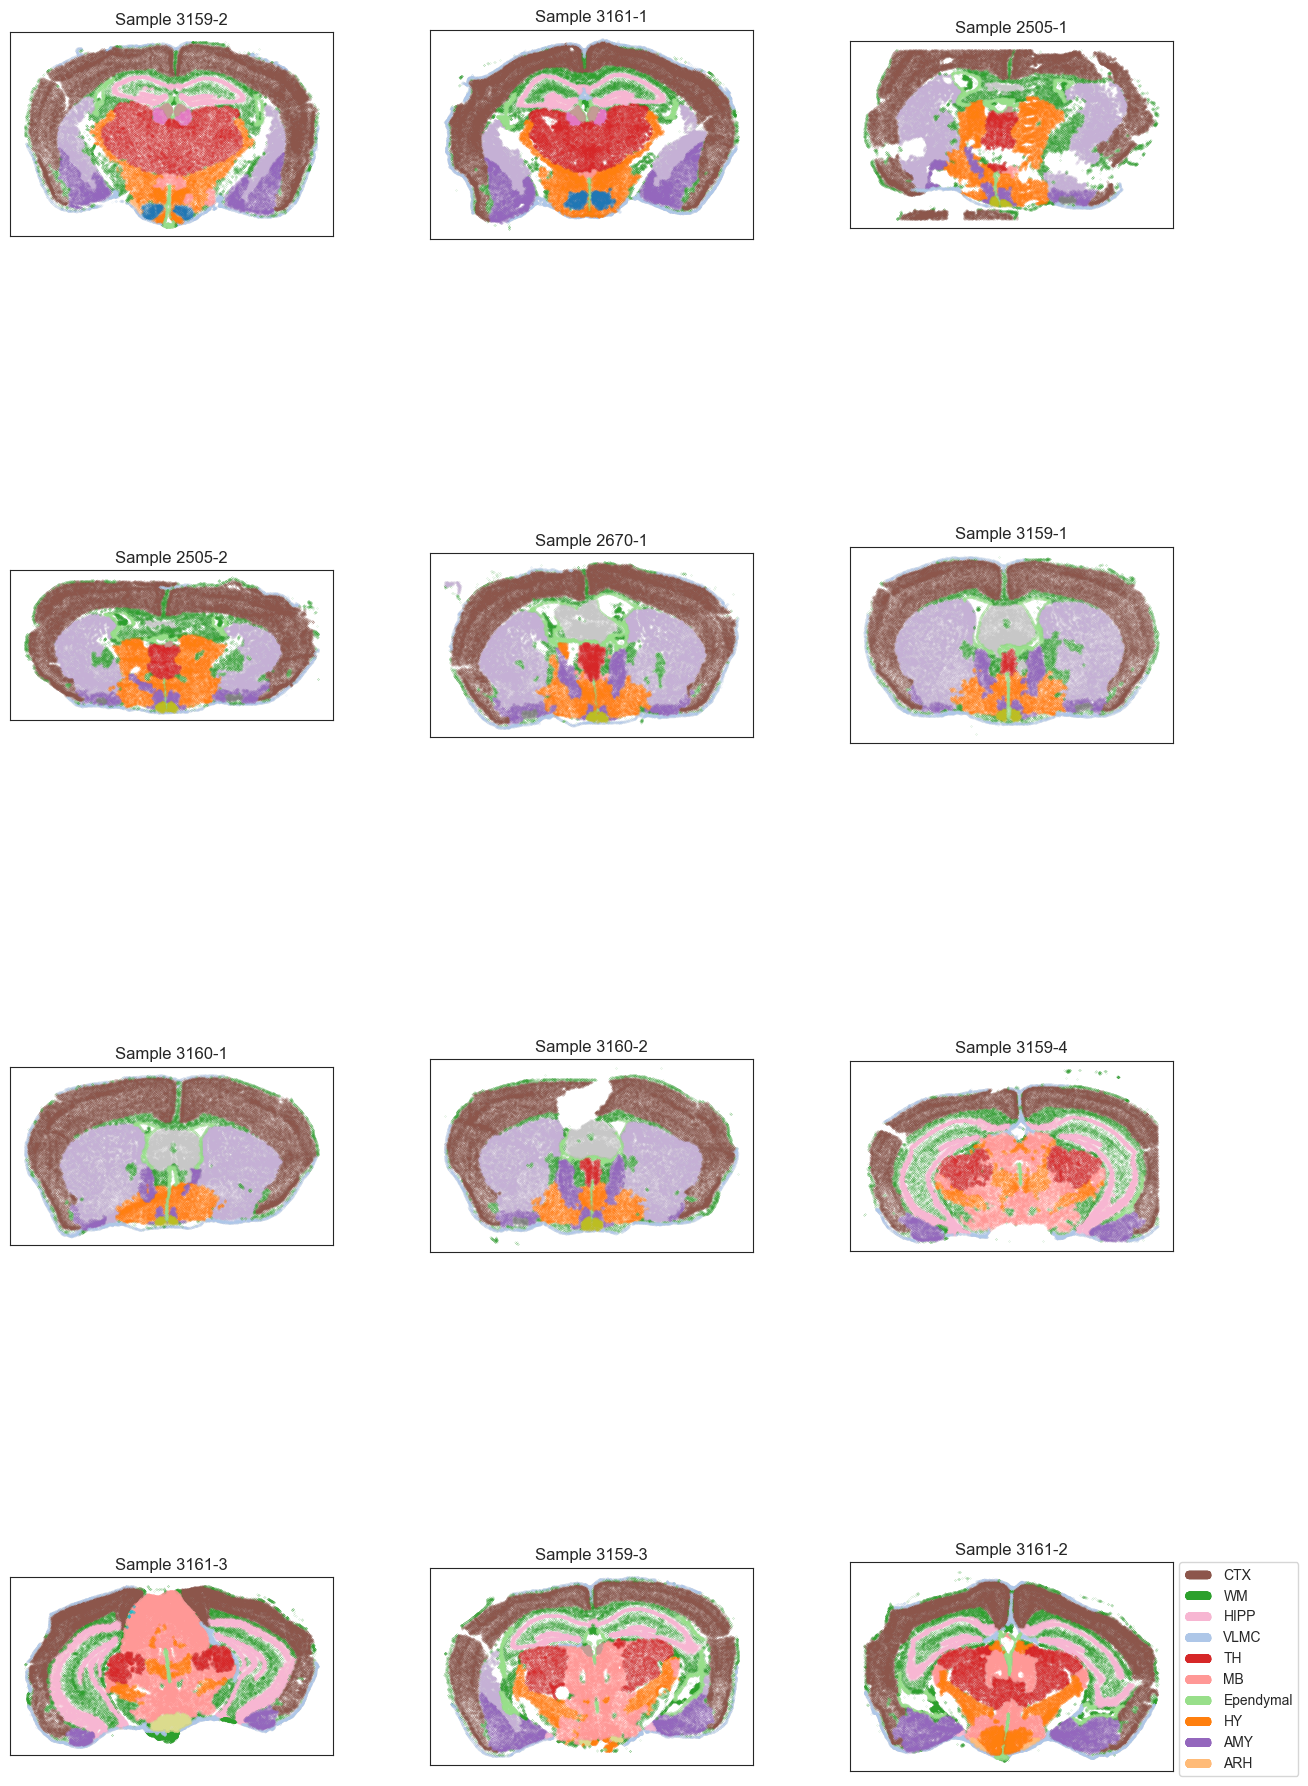

In [11]:
from module.dataviz_analysis import cluster_plot

cluster_plot(adata,
             cluster_to_use = 'region_automap_num',
             cluster_to_map = 'all',
             cmap_ = 'tab20',
             save_plot = False,
             name_dir= name_dir,
             dir_notebook=dir_notebook,
            )

## Polygon plots

### Data prep

In [ ]:
#####################################################################################################################
### This section requires that the cells polygons were extracted and saved as GEOjson (see Polygon_plot2.ipynb)######
#####################################################################################################################

import geopandas as gpd
from module.dataviz_analysis import polygonplot_dataprep

df, cells_geo, cluster_to_use = polygonplot_dataprep(adata,
                                    sample_to_plot='3159-1',
                                    cluster_to_use = 'cell_type_newnum_final',
                                    cmap_ = 'tab20',
                                    )

In [74]:
df.head(2)

,2010300C02Rik,Acsbg1,Acta2,Acvrl1,Adamts2,Adamtsl1,Adgrl4,Aldh1a2,Angpt1,Ano1,...,Vip,Vwc2l,Wfs1,Zfp366,Zfp536,Zfpm2,cell_id,region_automap,cell_type_final,sample
3159-1_0000bb20-613b-4a16-81fc-19903e19ec6d,1.335001,0.336472,0.0,0.0,0.955511,0.336472,0.0,0.0,0.0,0.0,...,0.0,0.0,1.223775,0.0,1.098612,0.0,3159-1_0000bb20-613b-4a16-81fc-19903e19ec6d,CTX,Oligodendrocyte,3159-1
3159-1_0000db56-176f-42c8-bd04-07716902e64c,0.510226,0.510226,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,1.672758,0.0,3159-1_0000db56-176f-42c8-bd04-07716902e64c,CTX,Lamp5 Gaba,3159-1


In [75]:
cells_geo.head(2)

,id,objectType,isLocked,measurements,cell,geometry,centroid,x_coor,y_coor,leiden_colors,cell type,region_automap_name
1,9958afa9-5753-49ec-a738-097df1f236ee,cell,NaN,"{ ""Nucleus: Area"": 49.5, ""Nucleus: Perimeter"":...",3159-1_9958afa9-5753-49ec-a738-097df1f236ee,"POLYGON ((9095.91 4164.71, 9086.79 4167.03, 90...",POINT (9102.68621 4200.45569),9102.686214,4200.455688,"(1.0, 0.4980392156862745, 0.054901960784313725)",VLMC,VLMC
2,82bad927-cd36-4d8b-bb28-005f974a3bcd,cell,NaN,"{ ""Nucleus: Area"": 23.75, ""Nucleus: Perimeter""...",3159-1_82bad927-cd36-4d8b-bb28-005f974a3bcd,"POLYGON ((9058.26 4171.76, 9039.46 4172.26, 90...",POINT (9050.33375 4206.95165),9050.333750,4206.951651,"(1.0, 0.7333333333333333, 0.47058823529411764)",Endothelial,VLMC


### Celltype + genes as symbols

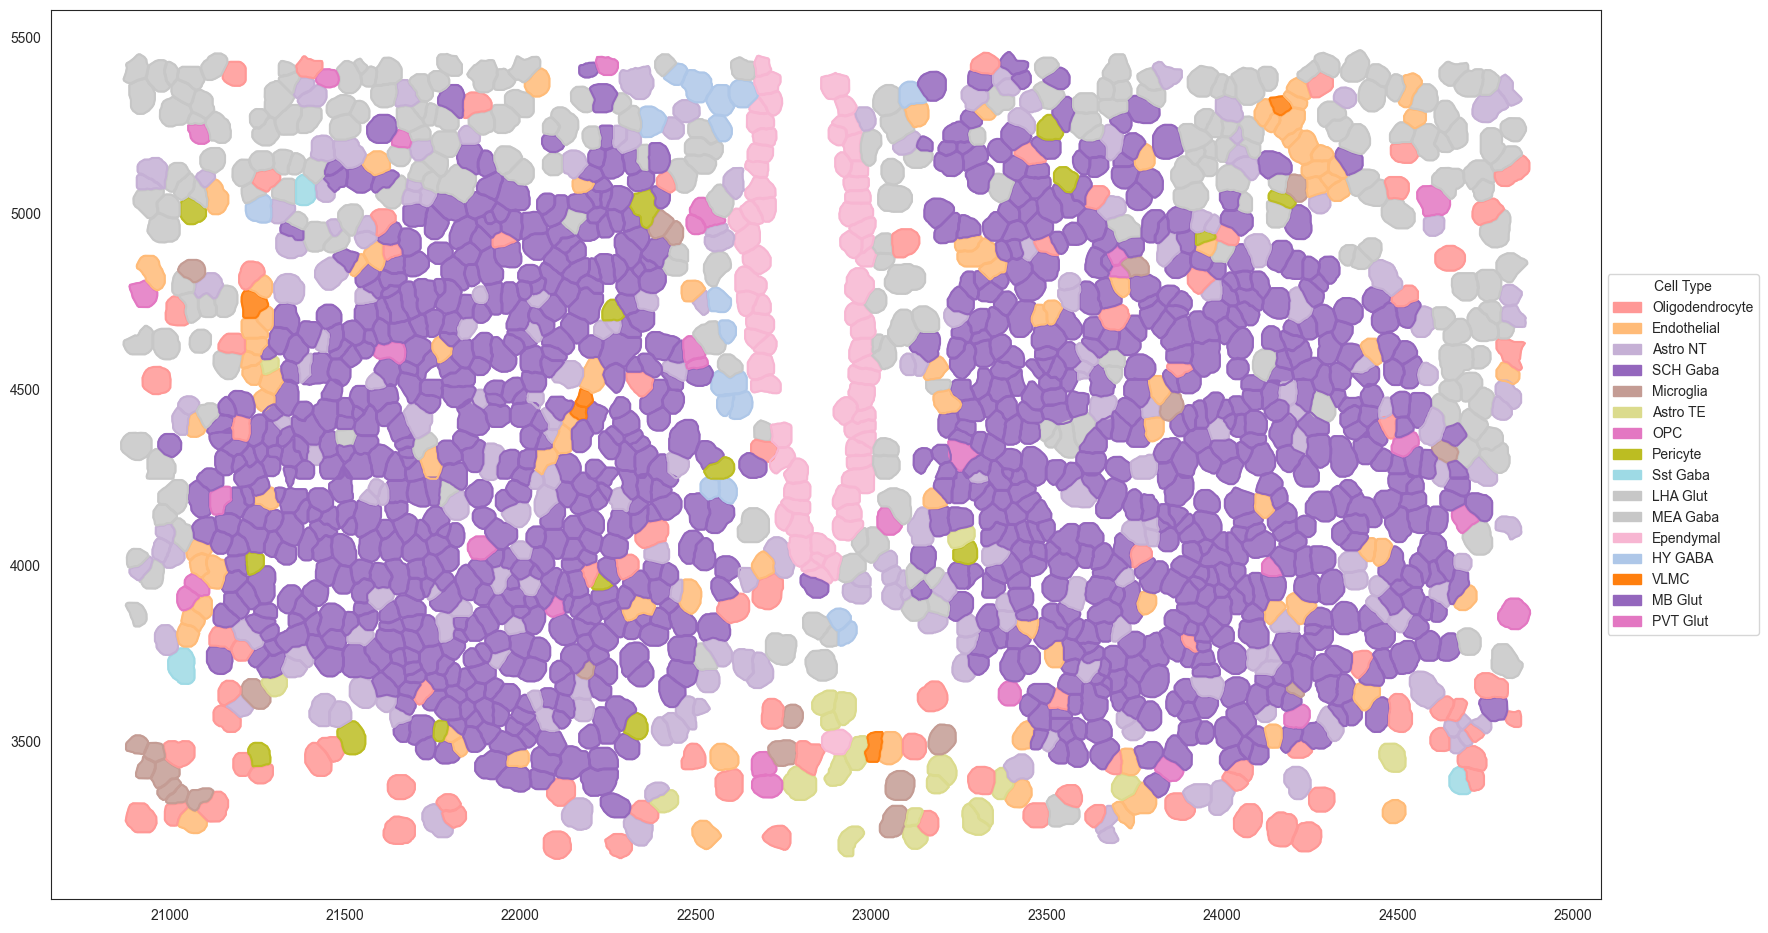

In [ ]:
from module.dataviz_analysis import polygonplot_plot
import pytz

polygonplot_plot(df, cells_geo,
                cluster_to_use = 'cell type',
                # name_dir = name_dir,
                # dir_notebook = dir_notebook,
                # gene_ = 'Gad1', # example = 'Gfap'
                # region_only = "HIPP", # example : 'SCH' ### Priority 1
                region_ = 'SCH', # example : 'SCH' ### Priority 2
                # coord_ = None, # example : [1000,2000,2000,3000] ### Priority 3
                coord_ = [5500,6000,4600,5200],
                save_plot = True)


In [ ]:
cells_geo['region_automap_name'].unique()

In [ ]:
import matplotlib.colors

region_ = 'STR'
xmin = cells_geo[cells_geo['region_automap_name']== region_]['x_coor'].min()
xmax = cells_geo[cells_geo['region_automap_name']== region_]['x_coor'].max()
ymin = cells_geo[cells_geo['region_automap_name']== region_]['y_coor'].min()
ymax = cells_geo[cells_geo['region_automap_name']== region_]['y_coor'].max()

cells_geo_crop = cells_geo[(cells_geo['x_coor'] >= xmin) & (cells_geo['x_coor'] <= xmax)  
                            & (cells_geo['y_coor'] >= ymin) & (cells_geo['y_coor'] <= ymax)]


fig, ax = plt.subplots(
    figsize=(20,20)
)   


cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=11)

cells_geo_crop.plot( ax=ax,
                color = cmap(norm(cells_geo_crop.circascore.values)),
                alpha=1,
                aspect=1,
                zorder=1,
                # edgecolor = cells_geo_crop['circascore'],
                )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)

### Gene expression as color gradient

In [ ]:
from module.dataviz_analysis import polygonplot_plot_gradient

polygonplot_plot_gradient(df, cells_geo,
                          gene_ = 'Per1', ## Required
                          region_ = 'HIPP',
                          region_only = None,
                          coord_ = [2000,4000,2000,4000],
                          cmap_ = 'brg',
                          save_plot = False)


## Other plots

In [ ]:
### Plot gene expression

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

if 'df' not in global():
    df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
    df['cell_id'] = df.index

gene_ = 'Chat'
adata_temp = adata
df_dict = dict(zip(df.index, df[gene_]))
adata_temp.obs[gene_] = adata_temp.obs['cell_id'].map(df_dict)

### to crop
adata_temp = adata_temp[(adata_temp.obs['x_centroid'] > 4000) & (adata_temp.obs['x_centroid'] < 6000)
                            & (adata_temp.obs['y_centroid'] > 4000) & (adata_temp.obs['y_centroid'] < 5000)]

# f, ax = plt.subplots(figsize=(15, 10))

fig, axs = plt.subplots(3,2#,figsize=(15, 15)
                        )
axs = axs.flatten()# Mapping of clusters

for idx, sample in enumerate(samples_ids):
    adata_graph = adata_temp[adata_temp.obs['sample'] == sample]
    
    sns.scatterplot(x='x_centroid', y='y_centroid',
                s=2, legend= False,
                palette='viridis',
                hue=gene_,
                data=adata_graph.obs, ax=axs[idx]).set(title=f"{sample} - {gene_}", xlabel = None, ylabel = None, xticklabels = [],yticklabels = [])

# Create the colorbar
norm = mpl.colors.Normalize(vmin=adata_temp.obs[gene_].min(),vmax=adata_temp.obs[gene_].max())
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[-1], aspect=40, shrink=0.8)  # Adjust aspect/shrink

del adata_temp, adata_graph


### Gene expression accross samples

In [ ]:
### Gene expression accross samples
if 'df' not in global():
    df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
    df['cell_id'] = df.index

dict_ = dict(zip(adata.obs['cell_id'],adata.obs['sample']))
df['sample'] = df['cell_id'].map(dict_)

gene = 'Vip'
x = df.groupby('sample')[gene].mean()

plt.scatter(x = x.index, y=x)
plt.tick_params(rotation=90)
plt.ylim(0,)
plt.title(f'Ndn expression of {gene}')
plt.ylabel('Normalized expression')

In [ ]:
# to_use = 'total_transcript' ### Run1
to_use = 'transcript_counts' ### Run3
samples = adata.obs['sample'].unique()

### Map log transcript counts 
adata_sel = adata[(adata.obs['sample'] == samples[0])]
adata_sel.obs[to_use] = adata_sel.obs[to_use].astype(float)
adata_sel.obs['log_transcript_counts'] = adata_sel.obs[to_use].apply(lambda x: math.log10(x))

fig, ax = plt.subplots(figsize=(10,6))
transcript_counts_unique = adata_sel.obs['log_transcript_counts'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['log_transcript_counts'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of transcript counts (log)')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='1.5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax, label='Transcript Counts')
plt.ylabel('Transcript counts (log)')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_logtranscounts.png")

In [ ]:
# to_use = 'n_genes' ### Run1
to_use = 'n_genes_by_counts' ### Run3
samples = adata.obs['sample'].unique()

### Map log n_genes_by_counts 
adata_sel = adata[(adata.obs['sample'] == samples[0])]
adata_sel.obs[to_use] = adata_sel.obs[to_use].astype(float)
adata_sel.obs['log_n_genes_by_counts'] = adata_sel.obs[to_use].apply(lambda x: math.log10(x))

fig, ax = plt.subplots(figsize=(10,6))
transcript_counts_unique = adata_sel.obs['n_genes_by_counts'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['n_genes_by_counts'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of Nb of gene per cell')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='1.5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax)
plt.ylabel('Nb of gene per cell')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_nbgenes.png")

In [ ]:
### Map mmc:cluster_correlation_coefficient
adata_sel = adata[(adata.obs['sample'] == samples[0])]

fig, ax = plt.subplots(figsize=(10,6))
transcript_counts_unique = adata_sel.obs['mmc:class_correlation_coefficient'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['mmc:class_correlation_coefficient'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.5, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of mmc:class_correlation_coefficient')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax, label='correlation_coefficient')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_mmccoef.png")

## Gene expression plots

### Define marker genes

In [ ]:
marker_genes = [
# 10X annotations


# 'Arntl','Clock','Cry1','Cry2','Nr1d1',"Per1",'Per2','Per3','Rora','Rorb', ## Clock genes
# 'Gfap','Trem2','Cd44','Spp1','Cd68','Igf1','Spi1','Cd300c2','Cd53','Laptm5','Ikzf1','Arhgap25','Opalin','Prox1','Cbln1','Sema3a','Paqr5','Spag16',
# "Vip", "Pkib", "Tmem255a", "Arhgap6", "Chodl", #SCN rank genes analysis
'Strip2',"Shisa6","Chodl", 'Fos','Sdk2', 'Cdh6','Cobll1','Tanc1'
# 'Dner','Gad1','Rasgrf2','Vat1l','Pde7b','Igfbp5','Rorb','Rims3','Tmem255a','Cdh13','Gad2','Rab3b','Parm1','Tle4','Fhod3','Rmst','Vip','Nr2f2','Arhgap6',
# 'Laptm5','Kctd12','Siglech','Trem2','Cd53','Cd68','Cd300c2','Ikzf1','Spi1','Acsbg1','Gfap','Dpy19l1','Unc13c','Arhgap25','Meis2','Dner','Arhgap12','Igfbp5','Ntsr2',
# "Gfap","Rbp4","Trem2","Th","Laptm5","Syt17","Opn3","Spp1","Cd44","Cd53","Igf1","Gjb2",
# "Vip","Prss35","Cd68","Cplx3","Siglech","Ikzf1","Cd300c2","Dcn","Spi1","Pkib","Fos","Angpt1",
# "Igfbp5","Chrm2","Rspo2","Arhgap25","Sst",
# 'Ntsr2'    
]


### Stacked violin plots

In [ ]:
ax = sc.pl.stacked_violin(adata, ### Can be more useful on subset of the data, otherwise "zero values" greatly change the graph
                         marker_genes, ### marker_genes or individual genes (ex: "Dner")
                         groupby='Genotype',
                         dendrogram=False,
                         log=False,
                         )

### Violin plot for individual genes with individual data point (1 graph/gene)

In [ ]:
sc.pl.violin(adata, marker_genes, groupby='Genotype', order = ['WT','APP'],
             jitter = 0.45,
             # log = True,
             # stripplot = False,
            )

# Analysis

## Highest expressed genes

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

# if 'leiden_colors' in adata.obs:
#     adata.obs = adata.obs.drop(columns=['leiden_colors'])
# adata.write_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

In [ ]:
adata2_WT=adata[adata.obs['Genotype']== 'WT']
adata2_APP=adata[adata.obs['Genotype']== 'APP']

sc.pl.highest_expr_genes(adata2_WT, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)
sc.pl.highest_expr_genes(adata2_APP, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

## Find marker genes for each cluster

In [ ]:
adata2 = adata[adata.obs['run'] == 'circa2']

In [ ]:
### Filter out all cell_type with less than 100 cells accross run
filter_ = adata2.obs['cell_type_final'].value_counts()
filter_ = filter_[filter_.values >= 100]
filter_ = filter_.index
adata2 = adata2[adata2.obs['cell_type_final'].isin(filter_)]

In [ ]:
# Obtain cluster-specific differentially expressed genes

# cluster_to_use = 'cell_type_newnum'
# cluster_to_use = 'cell type'
# cluster_to_use = 'cell_type_auto'
# cluster_to_use = 'cell_type_auto_sub'
cluster_to_use = 'cell_type_final'
# cluster_to_use = 'Genotype'

# sc.pp.normalize_total(adata, inplace=True)
# sc.pp.log1p(adata)
adata2.obs[cluster_to_use] = adata2.obs[cluster_to_use].astype(str)
sc.tl.rank_genes_groups(adata2, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)
sc.tl.dendrogram(adata2, groupby = cluster_to_use, n_pcs=None,
                 use_rep=None, var_names=None, use_raw=None,
                 cor_method='pearson', linkage_method='complete',
                 optimal_ordering=True, key_added=None)



### Hierarchical clustering

In [ ]:
from matplotlib import rcParams
FIGSIZE = (15, 3)
rcParams["figure.figsize"] = FIGSIZE
sc.pl.dendrogram(adata2, groupby='cell_type_final')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata, groupby=cluster_to_use, standard_scale="var", n_genes=5, dendrogram = True)

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata2,
                                n_genes=5,
                                values_to_plot="logfoldchanges", cmap='bwr',
                                # vmin=-4,
                                # vmax=4,
                                )

In [ ]:
### Extract all cluster compared to all others in a single sheet

dat = pd.DataFrame()
for i in range(0, len(adata.obs[cluster_to_use].unique())):
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

dat.to_csv(f"csv/{name_dir}/{name_dir}_{cluster_to_use}_markergenes.csv")

In [ ]:
### Compare two groups gene expression (whole section)
section_ = 'C3'
adata_temp = adata2[adata2.obs['section']==section_]
sc.tl.rank_genes_groups(adata_temp, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
dat1 = sc.get.rank_genes_groups_df(adata_temp, group='APP')
dat1['group'] = 'APP'

dat1 = dat1[ ### Choose filters here
# (dat1['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
(dat1['pvals_adj']<= 0.05) & # adjusted p-value
(abs(dat1['logfoldchanges']) > 0.26) # logfoldchange
]

dat1.to_csv(f"csv/{name_dir}/foldchange/{name_dir}_{section_}_whole_section_filter.csv")

## Subset (a)dataset for one cell type

In [ ]:
adata2.obs['cell_type_final'].value_counts()

In [ ]:
adata2 = adata
celltype_to_subset = "SCH Gaba"
adata_microglia = adata2[adata2.obs['cell_type_final'] == celltype_to_subset]

In [ ]:
samples_ids_sub = adata_microglia.obs['sample'].unique()

In [ ]:
sc.pl.stacked_violin(adata_microglia, marker_genes, groupby='Genotype', dendrogram=False,)

In [ ]:
sc.pl.violin(adata_microglia, marker_genes, groupby='Genotype', order = ['WT','APP'],
             #log = True,
             # stripplot = False,
            )

In [ ]:
sc.pp.normalize_total(adata_microglia, inplace=True)
sc.pp.log1p(adata_microglia)

In [ ]:
adata_microglia.obs['Genotype'].unique()

In [ ]:
sc.tl.rank_genes_groups(adata_microglia, groupby='Genotype', method="wilcoxon", tie_correct = True, corr_method="benjamini-hochberg", pts = True)
dat1 = sc.get.rank_genes_groups_df(adata_microglia, group = 'APP')

# dat.to_csv("marker_genes_0-4_run1.csv")

In [ ]:
dat1 =  dat1.sort_values(by='logfoldchanges', ascending=False)
# dat1 = dat1[(dat1['pct_nz_group'] > 0.15)]
dat1

In [ ]:
dat1_filter = dat1[(~dat1['logfoldchanges'].between(-0.26,0.26))
                   & (dat1['pvals_adj'] <= 0.05)
                    & (dat1['pct_nz_group'] > 0.15)
                      ]
dat1_filter.reset_index(inplace=True)
dat1_filter.to_csv('data/SCN_fold_change.csv', index=False)

### Volcano plot

In [ ]:
# dat1_filter = dat1[(~dat1['logfoldchanges'].between(-0.26,0.26)) & (dat1['pvals_adj'] <= 0.05) ]
# dat1_filter = dat1_filter.reset_index
# create sub pandas with genes over threshold
# plot after initial scatter with alpha = 1
# add text for each postion


plt.vlines(x=(-0.26,0.26), ymin=10e-24, ymax=1, color = "black", linestyles='dashed')
plt.hlines(y=0.05, xmin=-1, xmax=1, color = "black", linestyles='dashed')
plt.scatter(x=dat1['logfoldchanges'], y = dat1['pvals_adj'], alpha= 0.75, color = "grey", edgecolors=None)
plt.scatter(x= dat1_filter['logfoldchanges'], y=dat1_filter['pvals_adj'], alpha=1, color = 'red')
for idx, gene in enumerate(dat1_filter['names']):
    plt.text(dat1_filter['logfoldchanges'][idx], dat1_filter['pvals_adj'][idx], str(gene), color = 'black', fontsize = 12, ha= 'center')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel('Log2 Foldchange')
plt.ylabel('Adjusted p-value')
plt.savefig('Gallery/volcano_plot_SCN.svg')

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_microglia,
                                n_genes=5,
                                values_to_plot="logfoldchanges", cmap='bwr',
                                # vmin=-4,
                                # vmax=4,
                                )

In [ ]:
sc.pl.highest_expr_genes(adata_microglia, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

In [ ]:
adata_microglia_WT=adata_microglia[adata_microglia.obs['Genotype']== 'WT']
adata_microglia_APP=adata_microglia[adata_microglia.obs['Genotype']== 'APP']

sc.pl.highest_expr_genes(adata_microglia_WT, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)
sc.pl.highest_expr_genes(adata_microglia_APP, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

### Subcluster the subset

In [ ]:
# extract pca coordinates
X_pca = adata_microglia.obsm['X_pca'] 

sc.pp.pca(adata_microglia)
sc.pp.neighbors(adata_microglia)
sc.tl.umap(adata_microglia)

### Kmeans clustering
### You can choose the number of clusters by uncommenting n_clusters option
kmeans = KMeans(#n_clusters=2,
                random_state=0).fit(X_pca) 
adata_microglia.obs['kmeans'] = kmeans.labels_.astype(str)

sc.tl.leiden(adata_microglia, resolution = 0.2)

In [ ]:
### Choose one cluster to work with
#cluster_to_use = 'leiden0.4_classname'
# cluster_to_use = 'kmeans'
cluster_to_use = 'leiden'
# cluster_to_use = 'L04_newnum'

In [ ]:
### Number of cells per clusters
max_clust = len(adata_microglia.obs[cluster_to_use].unique())
for i in range(0, max_clust):
    count = adata_microglia.obs[cluster_to_use].value_counts().iloc[i]
    print(f"Cluster {i} : {count} cells")

In [ ]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_microglia.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("hls", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_microglia.obs['leiden_colors'] = adata_microglia.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

In [ ]:
### Let's make UMAP plot. We will also add the cluster centroids to the plot
adata_microglia.obs['umap-1'] = adata_microglia.obsm['X_umap'][:, 0]
adata_microglia.obs['umap-2'] = adata_microglia.obsm['X_umap'][:, 1]
cluster_centroids = adata_microglia.obs.groupby(cluster_to_use)[['umap-1', 'umap-2']].median()

In [ ]:
from dataviz_analysis import umap_plot_indi_multi
samples_ids = samples_ids
umap_plot_indi_multi(adata_microglia,
                     cluster_to_use = "leiden",
                     individual_plot = True,
                     save_plot = False,
                     cmap_ = 'hls',
                     )

In [ ]:
samples_ids_sub

In [ ]:
# Map all cells
fig, axs = plt.subplots(3,4,figsize=(30, 15))
axs = axs.flatten()
clusters_plot = {0: 'magenta',1: 'cyan',2: 'green', "":'red', "":'orange',"7":'black',"":"purple"
                }

for idx, sample in enumerate(samples_ids_sub):
    adata_sel = adata_microglia[(adata_microglia.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        colors= cluster_data['leiden_colors'].unique()[0] ### for all clusters
        axs[idx].scatter(cluster_data['x_centroid'].astype('float'), cluster_data['y_centroid'].astype('float'), color=colors, s=10, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")
        # axs[idx].set_ylim(400,1300)
        # axs[idx].set_xlim(4100,5600)



In [ ]:
from dataviz_analysis import cluster_plot

cluster_plot(adata_microglia,
             cluster_to_use = 'cell_type_final',
             cluster_to_map = 'all',
             cmap_ = 'hls',
             save_plot = False,
            )

In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_microglia.obs[cluster_to_use], adata_microglia.obs['mmc:supertype_name'], normalize="index")
plt.figure(figsize=(120, 10))
sns.heatmap(cont_tab, annot=True, cmap="YlGnBu", fmt=".1f")

In [ ]:
# Obtain cluster-specific differentially expressed genes
cluster_to_use = 'leiden'
# cluster_to_use = 'Genotype'
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
# sc.tl.dendrogram(adata_microglia, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

sc.pl.rank_genes_groups_dotplot(
    adata_microglia,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    vmin=-4,
    vmax=4,
)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_microglia, groups=adata_microglia.obs[cluster_to_use], n_genes=1)

In [ ]:
ax = sc.pl.stacked_violin(adata_microglia, var_names = marker_genes , groupby='kmeans', dendrogram=True)

In [ ]:
# Obtain cluster-specific differentially expressed genes
# cluster_to_use = 'kmeans'
cluster_to_use = 'Genotype'
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
# sc.tl.dendrogram(adata_microglia, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

sc.pl.rank_genes_groups_dotplot(
    adata_microglia,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    # vmin=-4,
    # vmax=4,
)

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata2.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{celltype_to_subset}.csv")

In [ ]:
dfs = []

a_ = 0
strerhyt = '-'
strenbis = ' '

all_celltype = adata_microglia.obs['leiden'].unique()

for cell_type_to_extract in all_celltype:
    adata_microglia_temp = adata_microglia[adata_microglia.obs['leiden'] == cell_type_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata_microglia_temp.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia_temp[adata_microglia_temp.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia_temp[adata_microglia_temp.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        a_ +=1
        print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')
        continue

    adata_microglia_temp.obs[cluster_to_use] = adata_microglia_temp.obs[cluster_to_use].astype(str)
    #sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
    sc.tl.rank_genes_groups(adata_microglia_temp, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
    # sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)
    
    for i in adata_microglia_temp.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia_temp, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    dat = dat[ ### Choose filters here
    (dat['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
    (dat['pvals_adj']<= 0.05) & # adjusted p-value
    (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
    ]
    a_ +=1
    print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')

    dfs.append(dat)
else:
    print('Extraction done')


import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{celltype_to_subset}_subclusters_df_comb.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

writer.close()

In [ ]:
celltype_to_subset = "SCH"
adata_region_cell = adata2[adata2.obs['cell type'] == celltype_to_subset]

## Subset one region

In [ ]:
adata2.obs['region_automap'].unique()

In [36]:
region_to_subset = "SCH"
adata_region = adata[adata.obs['region_automap_name'] == region_to_subset]
sc.pp.log1p(adata_region)

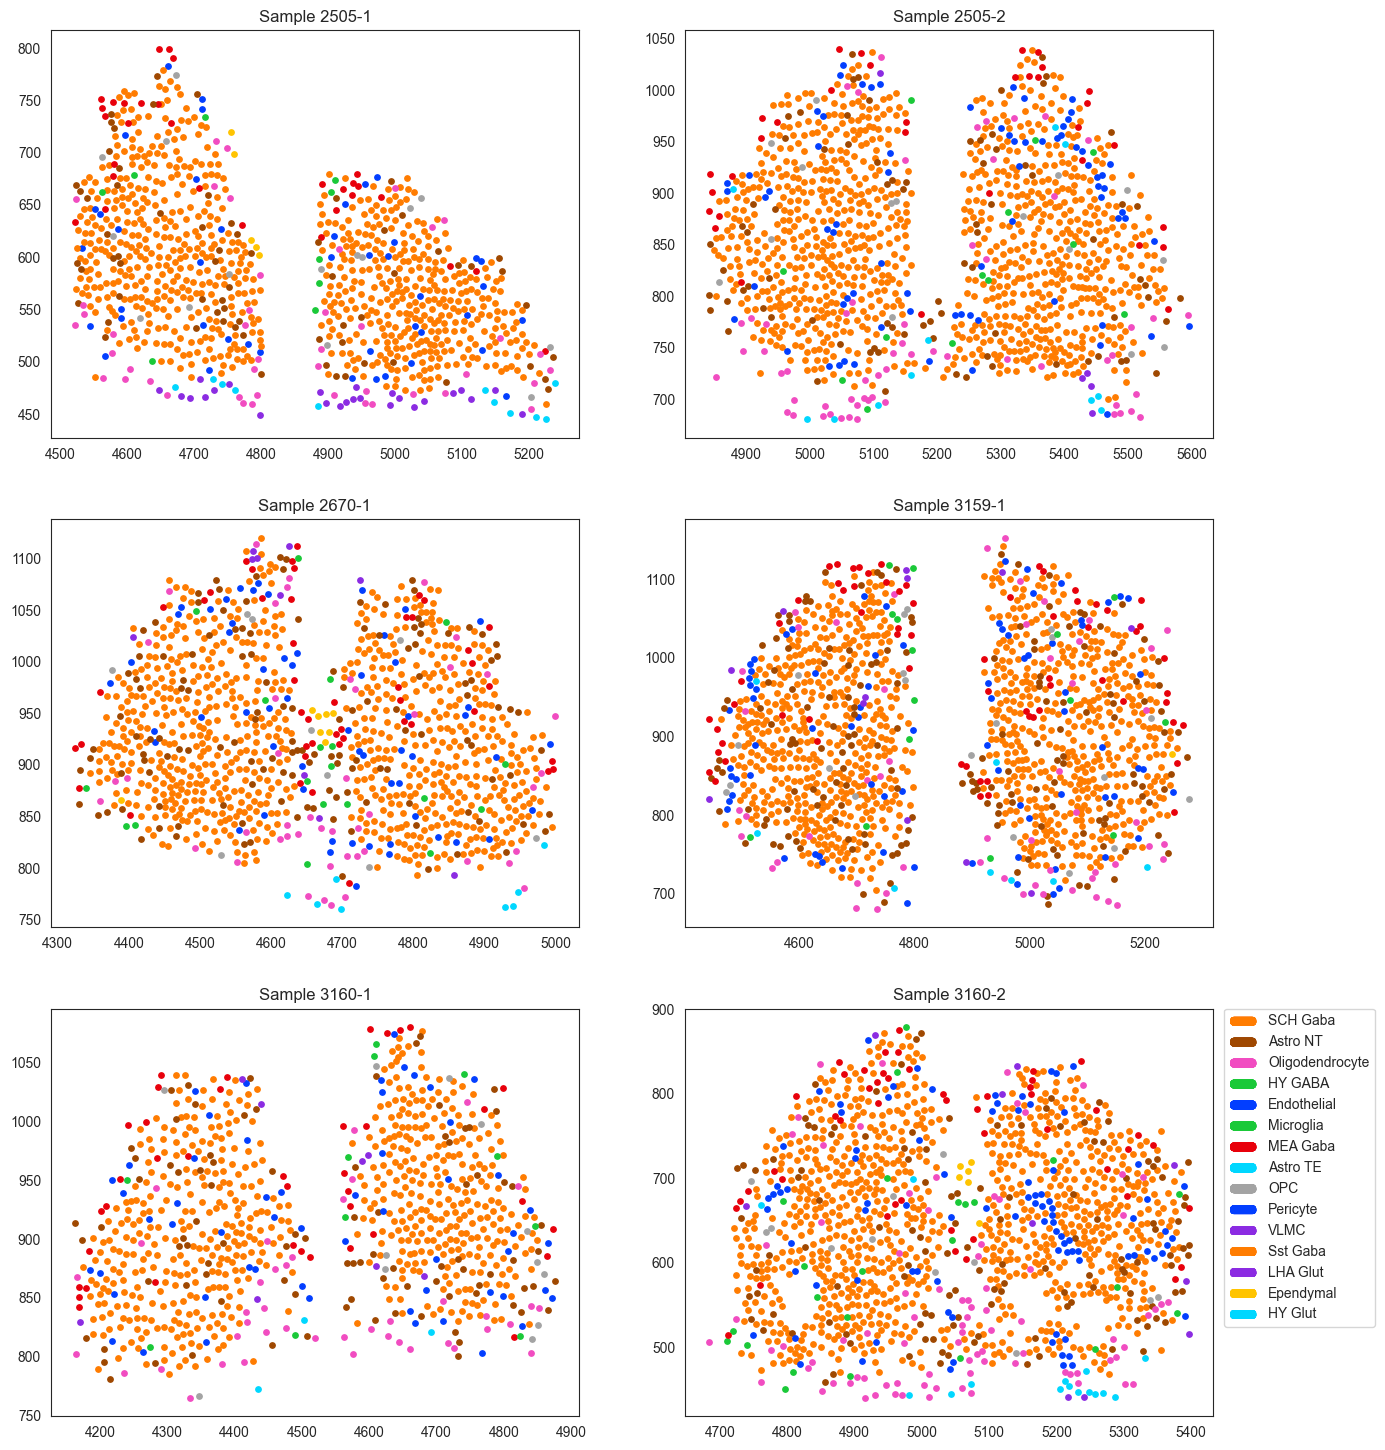

In [11]:
# Generate new numbering base on unique 'cell type'
all_cell_type = adata_region.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata_region.obs['cell_type_newnum_final'] = adata_region.obs['cell_type_final'].map(mapping_dict)
# mapping_dict

### Generate a color palette for the clusters - to make color stay consistent across samples
adata_region.obs['cell_type_newnum_final'] = adata_region.obs['cell_type_newnum_final'].astype(int)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_region.obs['cell_type_newnum_final'].unique())
palette = sns.color_palette("bright", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_region.obs['kmeans_colors'] = adata_region.obs['cell_type_newnum_final'].apply(lambda x: palette[x])

# Mapping of clusters
fig, axs = plt.subplots(3,2,figsize=(15, 18))
axs = axs.flatten()
clusters_plot = { 1: 'lightcoral', 11:'black',4:'red',
    # 0: 'orchid', 1: 'forestgreen',2: 'coral', 4:'orange',
    # 3:'red', 5:'blue',6:'cyan',7:'black'
    # 4:'red',0:'black'
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_region[(adata_region.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs['cell_type_newnum_final'].unique():
        cluster_data = adata_sel.obs[adata_sel.obs['cell_type_newnum_final'] == cluster_id]
        if len(cluster_data) >= 0:
            colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none"
            colors= cluster_data['kmeans_colors'].unique()[0]
            axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=15, label=cluster_data['cell_type_final'].unique()[0])
            axs[idx].set_title(f"Sample {sample}")

plt.legend(markerscale=1, scatterpoints=1000, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
# len(adata_region)/1000
# adata_region_notunique.obs.groupby('cell type')['cell_id'].nunique()
# list_to_exclude

In [15]:
list_to_exclude  = adata_region.obs.groupby('cell_type_final')['cell_id'].nunique() >= 10
list_to_exclude.values
dict_exclude = dict(zip(list_to_exclude.index, list_to_exclude.values))
dict_exclude

adata_region.obs['exclude'] = adata_region.obs['cell_type_final'].map(dict_exclude)

adata_region_notunique = adata_region[adata_region.obs['exclude'] != False]

adata_region_notunique.obs['cell_type_final'].value_counts()

SCH Gaba           4876
Astro NT            678
Endothelial         342
Oligodendrocyte     328
MEA Gaba            262
OPC                  82
Microglia            68
Pericyte             59
Astro TE             55
VLMC                 39
LHA Glut             31
HY GABA              23
Ependymal            19
Name: cell_type_final, dtype: int64

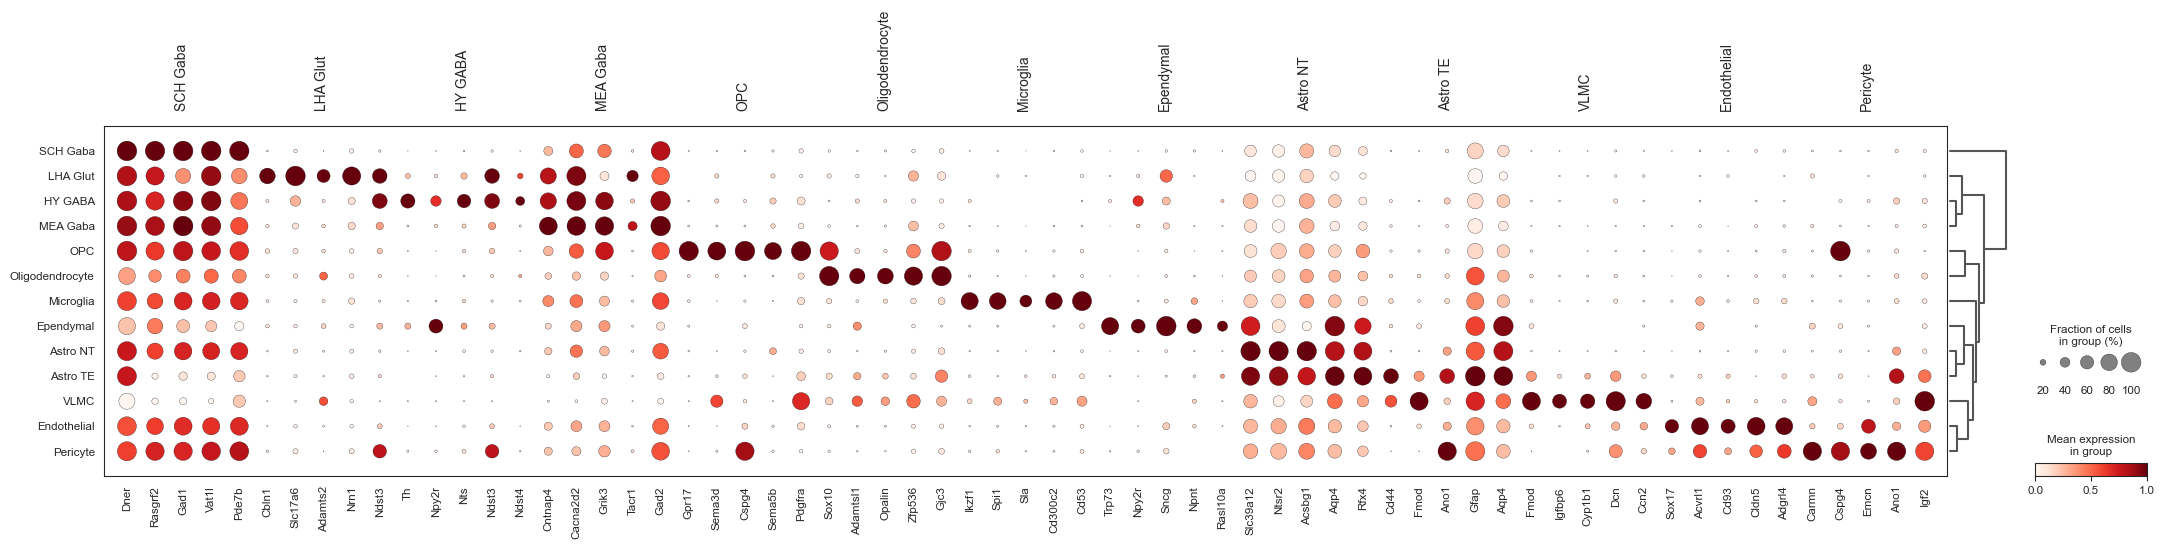

In [32]:
sc.pp.log1p(adata_region_notunique)
sc.tl.dendrogram(adata_region_notunique, groupby = 'cell_type_final', n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_region_notunique, groupby='cell_type_final', method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata_region_notunique, groupby='cell_type_final', standard_scale="var", n_genes=5)

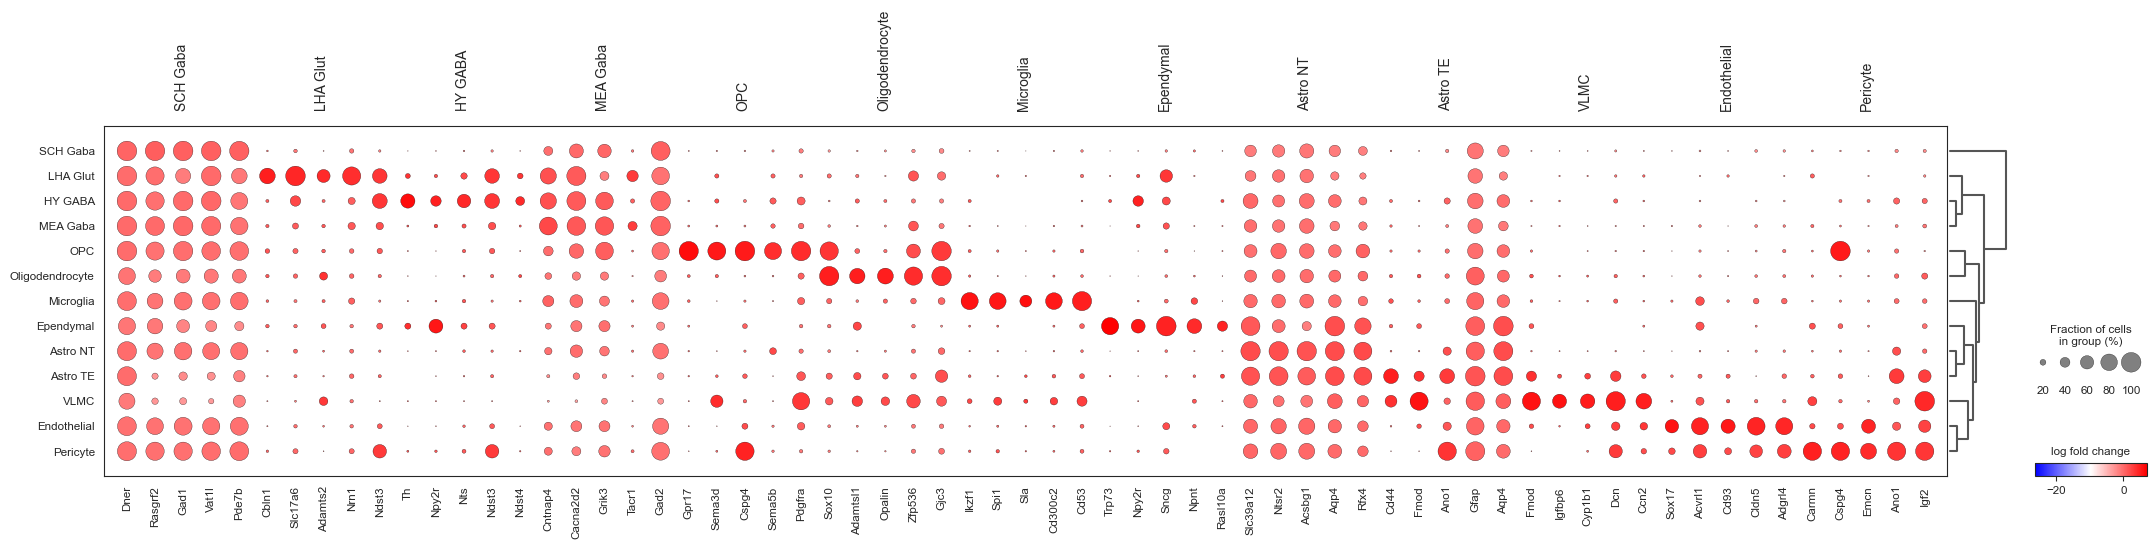

In [33]:
sc.pl.rank_genes_groups_dotplot(
    adata_region_notunique,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    # vmin=-4,
    # vmax=4,
)

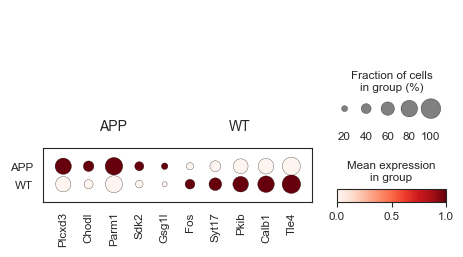

Cluster APP
Cluster WT


In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_region.obs[cluster_to_use] = adata_region.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_region, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_region, groupby=cluster_to_use, standard_scale="var", n_genes=5, save=False)


dat = pd.DataFrame()
for i in adata_region.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_region, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{region_to_subset}-region.csv")

In [47]:
celltype_to_subset = "SCH Gaba"
adata_region_cell = adata_region[adata_region.obs['cell_type_final'] == celltype_to_subset]
sc.pp.log1p(adata_region_cell)

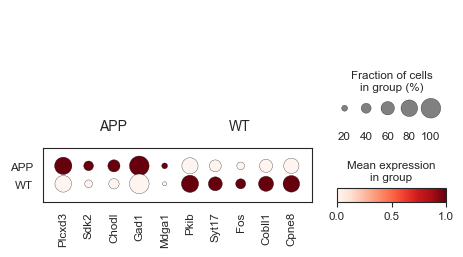

Cluster APP
Cluster WT


In [48]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_region_cell.obs[cluster_to_use] = adata_region_cell.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_region_cell, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_region_cell, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata_region_cell.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_region_cell, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{region_to_subset}-region-{celltype_to_subset}-cell.csv")

# Output files

## Extract foldchange, pvalue, etc.

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

In [ ]:
adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")

In [ ]:
adata2.obs['cell_type_newnum_final'] = adata.obs['cell_type_newnum_final']
adata2.obs['cell_type_final'] = adata.obs['cell_type_final']
adata2.obs['region_automap_name'] = adata.obs['region_automap_name']
# adata2.obs['region_automap_num'] = adata.obs['region_automap_num']
# adata2.obs['region_manual'] = adata.obs['region_manual_name']

adata2.obsm['reduced_pc_20_umap'] = adata.obsm['reduced_pc_20_umap']

all_celltype = np.array(adata2.obs['cell_type_final'].unique())

In [ ]:
adata2.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz", compression='gzip')

In [ ]:
# HC only
adata2.obs['Genotype'] = 0
adata2.obs['ZT'] = 0

geno_dict = {'3159-1':'WT','2670-1':'WT','3159-2':'WT','3159-3':'WT','3159-4':'WT','2505-1':'APP','2505-2':'APP','3160-1':'APP',
             '3160-2':'APP','3161-1':'APP','3161-2':'APP','3161-3':'APP',
}
ZT_dict = {
    '3159-1':'ZT17','2670-1':'ZT5','3159-2':'ZT17','3159-3':'ZT17','3159-4':'ZT17','2505-1':'ZT5','2505-2':'ZT5',
'3160-1':'ZT17','3160-2':'ZT17','3161-1':'ZT17','3161-2':'ZT17','3161-3':'ZT17',
}

adata2.obs['Genotype'] = adata2.obs['sample'].map(geno_dict)
adata2.obs['ZT'] = adata2.obs['sample'].map(ZT_dict)

In [ ]:
sc.pp.normalize_total(adata2, inplace=True)
sc.pp.log1p(adata2)

In [ ]:
gene_names = np.array(adata.var_names)
gene_names = sorted(gene_names)
# print(gene_names)

### Extract DEG whole brain

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='Genotype', method="wilcoxon", tie_correct = True, pts = True)

for i in adata.obs[cluster_to_use].unique():
    # print(f"Cluster {cell_type_to_extract}_{i}")
    dat = sc.get.rank_genes_groups_df(adata_microglia, group="APP")


# # ### Extract normalized expression and clusters for individual cells
# # if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/foldchange"):
# #    os.makedirs(f"{dir_notebook}/csv/{name_dir}/foldchange")
# dat.to_csv(f"csv/{name_dir}/foldchange/{name_dir}_foldchange_wholesection.csv")

### Extract DEG celltypes by celltypes

In [53]:
adata = adata_region

In [54]:
all_celltype = np.array(adata.obs['cell_type_final'].unique())

In [60]:
import progressbar

dfs = []
filters_ = True
filters_dic = {'percentage_pop': 0.15,
               'pval_adj' : 0.05,
               'logfoldchanges' : 0.26}

a_ = 0
bar = progressbar.ProgressBar(maxval=len(all_celltype), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for cell_type_to_extract in all_celltype:
    adata_microglia = adata[adata.obs['cell_type_final'] == cell_type_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        # a_ +=1
        continue

    adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
    #sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
    sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
    # sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)
    
    for i in adata.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    if filters_ == True:
        dat = dat[ ### Choose filters here
        (dat['pct_nz_group'] > filters_dic['percentage_pop']) & #Percentage of cell expressing the gene
        (dat['pvals_adj']<= filters_dic['pval_adj']) & # adjusted p-value
        (abs(dat['logfoldchanges']) > filters_dic['logfoldchanges']) # logfoldchange
        ]

    a_ +=1
    bar.update(a_+1)

    dfs.append(dat)
else:
    print('Extraction done')

bar.finish()

writer = pd.ExcelWriter(f'{dir_notebook}/csv/{name_dir}/{region_to_subset}_df_comb_nothres.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

writer.close()

[                                                                        ]   0%
[=======                                                                 ]  10%
[==========                                                              ]  15%
[==============                                                          ]  20%
[==================                                                      ]  25%
[=====================                                                   ]  30%
[=========================                                               ]  35%
[============================                                            ]  40%
[================================                                        ]  45%
[====================================                                    ]  50%
[=======================================                                 ]  55%
[===========================================                             ]  60%
[=======================================

Extraction done


In [ ]:
all_regions = np.array(['VMH', 'VLMC', 'HY', 'ARH', 'Ependymal', 'TH', 'MB', 'AMY',
       'STR', 'CTX', 'MH', 'LH', 'HIPP', 'NLOT', 'LSX', 'SCH', 'MM', 'SC'])

In [ ]:
dfs = []
# all_regions = np.array(adata2.obs['region_automap'].unique())
# all_regions = all_regions[np.logical_not(np.isnan(all_regions))]

filters_ = True
filters_dic = {'percentage_pop': 0.15,
               'pval_adj' : 0.05,
               'logfoldchanges' : 0.26}

a_ = 0
bar = progressbar.ProgressBar(maxval=len(all_regions), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()


for region_to_extract in all_regions:
    adata_microglia = adata2[adata2.obs['region_automap_name'] == region_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata2.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        # a_ +=1
        continue

    adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
    sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
   
    for i in adata2.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    if filters_ == True:
        dat = dat[ ### Choose filters here
        (dat['pct_nz_group'] > filters_dic['percentage_pop']) & #Percentage of cell expressing the gene
        (dat['pvals_adj']<= filters_dic['pval_adj']) & # adjusted p-value
        (abs(dat['logfoldchanges']) > filters_dic['logfoldchanges']) # logfoldchange
        ]

    a_ +=1
    bar.update(a_+1)

    dfs.append(dat)
else:
    print('Extraction done')


import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/all_regions_df_comb.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_regions[j], index=False)

writer.close()

### Extract DEG per celltypes and regions

In [ ]:
all_regions = np.array(adata.obs['region_automap'].unique())

In [ ]:
all_celltype = np.array(adata.obs['cell_type_final'].unique())
all_celltype

In [ ]:


for region_to_extract in all_regions:
    
    cluster_to_use = 'Genotype'
    clust_uniq = adata.obs[cluster_to_use].unique()
    
    adata3 = adata[adata.obs['region_automap'] == region_to_extract]

    
    if (len(adata3[adata3.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata3[adata3.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        continue

    dfs = []
    a_ = 0
    strerhyt = '-'
    strenbis = ' '
    all_celltype = np.array(adata3.obs['cell_type_final'].unique())
    print(f'Starting region : {region_to_extract}')
    for cell_type_to_extract in all_celltype:
        adata_microglia = adata3[adata3.obs['cell_type_final'] == cell_type_to_extract]
        
        ### Extract gene expression per cluster + log fold change + p-value
        
        
        dat = pd.DataFrame()

        if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
            dat['nothing'] = ['to see here']
            dfs.append(dat)
            a_ +=1
            print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')
            continue

        adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
        sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
        
        for i in adata3.obs[cluster_to_use].unique():
            # print(f"Cluster {cell_type_to_extract}_{i}")
            dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
            dat1['group'] = i
            dat = pd.concat([dat, dat1])

        dat = dat[ ### Choose filters here
        (dat['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
        (dat['pvals_adj']<= 0.05) & # adjusted p-value
        (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
        ]
        a_ +=1
        print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')

        dfs.append(dat)
    else:
        print('Extraction done')


    
    writer = pd.ExcelWriter(f'csv/{name_dir}/foldchange/regions/{region_to_extract}_all_celltypes_df_comb.xlsx', engine='xlsxwriter')
    for j in range(0,len(dfs)):
        dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

    writer.close()

## Normalized gene counts with all annotations

In [ ]:
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

from module.xenium_preprocessing import add_annotations
df = add_annotations(adata,df)

In [ ]:
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

from module.xenium_preprocessing import add_annotations
df = add_annotations(adata,df)

In [ ]:
run_ = 'circa2'

if run_ == 'circa2':
    df_ = df[df['run']=='circa2']
    celltypes_ = df_['cell_type_final'].unique()
elif run_ == 'circa4':
    df_ = df[df['run']=='circa4']
    celltypes_ = df_['cell_type_final'].unique()
else:
    print('Wrong run info')


marker_genes = adata.var.index ### Extract all genes. If you want a selected list, use genes_list() (module.misc)


import progressbar
bar = progressbar.ProgressBar(maxval=len(df_), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
tracker_=0

gene_dfs = []

genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['sample'].unique())

for celltype in celltype_:
    df2 = df_[df_['cell_type_final'] == celltype]
    genes_df = pd.DataFrame()
    for gene_ in marker_genes:
        temp = df2.groupby('ZT')[gene_].mean()
        temp_df = pd.DataFrame(temp)
        genes_df = pd.concat([genes_df, temp_df], axis = 1)
    tracker_ +=1
    bar.update(tracker_)
    gene_dfs.append(genes_df)

import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{name_dir}4_gene_dfs.xlsx', engine='xlsxwriter')
for j in range(0,len(gene_dfs)):
    gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=True)
writer.close()


In [ ]:
run_ = 'circa2'

if run_ == 'circa2':
    df_ = df[df['run']=='circa2']
    celltypes_ = df_['cell_type_final'].unique()
elif run_ == 'circa4':
    df_ = df[df['run']=='circa4']
    celltypes_ = df_['cell_type_final'].unique()
else:
    print('Wrong run info')


marker_genes = adata.var.index ### Extract all genes. If you want a selected list, use genes_list() (module.misc)


import progressbar
bar = progressbar.ProgressBar(maxval=len(df_), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
tracker_=0

gene_dfs = []

genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['sample'].unique())

for celltype in celltype_:
    df2 = df_[df_['cell_type_final'] == celltype]
    genes_df = pd.DataFrame()
    for gene_ in marker_genes:
        temp = df2.groupby('ZT')[gene_].mean()
        temp_df = pd.DataFrame(temp)
        genes_df = pd.concat([genes_df, temp_df], axis = 1)
    tracker_ +=1
    bar.update(tracker_)
    gene_dfs.append(genes_df)

import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{name_dir}4_gene_dfs.xlsx', engine='xlsxwriter')
for j in range(0,len(gene_dfs)):
    gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=True)
writer.close()


In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")
adata_norm = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")


In [ ]:
len(adata_norm), len(adata)

In [ ]:
adata.obs.head()

In [ ]:
# adata_norm = adata2
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
df['cell_id'] = df.index

from module.xenium_preprocessing import add_annotations

df = add_annotations(adata, df)

In [ ]:
df.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined.parquet")

In [ ]:
df = pd.read_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined.parquet")

In [ ]:
celltype_ = adata.obs['cell_type_final'].unique()
# celltype_ = adata.obs['cell_type_final'].unique()[0:1]
gene_dfs = []
# df2 = df
marker_genes = adata_norm.var.index
genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['sample'].unique())

for celltype in celltype_:
    df2 = df[df['cell_type_final'] == celltype]
    genes_df = pd.DataFrame()
    for gene_ in marker_genes:
        temp = df2.groupby('sample')[gene_].mean()
        temp_df = pd.DataFrame(temp)
        genes_df = pd.concat([genes_df, temp_df], axis = 1)
    gene_dfs.append(genes_df)


import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{name_dir}_gene_dfs.xlsx', engine='xlsxwriter')
for j in range(0,len(gene_dfs)):
    gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=False)

writer.close()

## Extract score, FC, p-value for each genes, compared to other clusters

In [ ]:
### Extract gene expression per cluster + log fold change + p-value

cluster_to_use = 'sample'
# cluster_to_use = 'Genotype'

adata2.obs[cluster_to_use] = adata2.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata2, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)

# sc.pl.rank_genes_groups_dotplot(adata2, groupby=cluster_to_use, standard_scale="var", n_genes=5)
a_ = 0
bar = progressbar.ProgressBar(maxval=len(all_celltype), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

dat = pd.DataFrame()
for i in adata2.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata2, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])
    a_ +=1
    bar.update(a_+1)

bar.finish()

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_allbrain.csv")

In [ ]:
dict_type = dict(zip(adata.obs['cell_type_final'],adata.obs['cell_type_final']))

In [ ]:
all_cell_type = adata.obs['cell_class'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_class_newnum'] = adata.obs['cell_class'].map(mapping_dict)
mapping_dict

In [52]:
mapping_dict = {
    'VMH': 'VMH',
 'VLMC': 'VLMC',
 'HY': 'HY',
 'ARH': 'ARH',
 'Ependymal': 'Ependymal',
 'TH': 'TH',
 'MB': 'MB',
 'AMY': 'AMY',
 'STR': 'STR',
 'CTX': 'CTX',
 'MH': 'MH',
 'LH': 'LH',
 'HIPP': 'HIPP',
 'NLOT': 'NLOT',
 'LSX': 'LSX',
 'SCH': 'SCH',
 'MM': 'MM',
 'SC': 'SC'
 }
adata.obs['region_automap_name2'] = adata.obs['region_automap_name'].apply(lambda x: mapping_dict[x] if x in mapping_dict else "WM")

## Extract cell population comparison

In [49]:
adata_region = adata[adata.obs['region_automap_name'] == 'SCH']

In [ ]:
# adata_region.obs.groupby('Genotype', as_index=False)['cell_type_final'].value_counts(normalize=False)
df_t = adata_region.obs.groupby('sample', as_index=False)[['Genotype','cell_type_final']].value_counts(normalize=False)
adata_region.obs.value_counts(['Genotype','cell_type_final',], normalize=False)


Genotype  cell_type_final
APP       SCH Gaba           0.463237
WT        SCH Gaba           0.245278
APP       Astro NT           0.053618
WT        Astro NT           0.044900
APP       Oligodendrocyte    0.033566
          Endothelial        0.033275
          MEA Gaba           0.021941
WT        Endothelial        0.016420
          MEA Gaba           0.016129
          Oligodendrocyte    0.014095
APP       OPC                0.007847
          Microglia          0.006684
          Astro TE           0.005667
          Pericyte           0.005231
          VLMC               0.005086
WT        OPC                0.004069
          Pericyte           0.003342
          Microglia          0.003197
          LHA Glut           0.002616
          Astro TE           0.002325
APP       LHA Glut           0.001889
WT        HY GABA            0.001744
APP       HY GABA            0.001598
          Ependymal          0.001598
WT        Ependymal          0.001162
APP       Sst Gaba      

In [ ]:
df_t.to_csv(f'csv/{name_dir}/{name_dir}_SCH_cellpop.csv')

### Not sure what it is for... to recheck later

In [ ]:
test = df.groupby('run')['Cry1'].mean()
df['Per2'][0] == int(df['Per2'][0])

In [ ]:
df2=df[df['run']=='circa2']
test2 = df2.groupby('run')['Cry1'].mean()
test_df2 = pd.DataFrame(test2)

for gene in df2.columns:
    if df2[gene][0] == int(df2[gene][0]):
        temp = df2.groupby('sample')[gene].mean()
        test_df2[gene] = temp

In [ ]:
import pandas as pd
test_df = pd.DataFrame(test)
test_df

In [ ]:
for gene in df.columns:
    if df[gene][0] == int(df[gene][0]):
        temp = df.groupby('run')[gene].mean()
        test_df[gene] = temp

In [ ]:
adata.obs['run']

In [ ]:
test_df_T = test_df.T
test_df_T['diff'] = test_df_T['circa4'] / test_df_T['circa2'] * 100
test_df_T

In [ ]:
df2_T = df2.T
df2_melt = df2_T.melt()
df2_melt

In [ ]:
sns.kdeplot(df2_melt, hue='sample', x='value')

In [ ]:
sns.histplot(test_df_T['circa2'], kde = True)
sns.histplot(test_df_T['circa4'])

In [ ]:
sns.histplot(test_df_T['diff'], density = True, bins = 100)
plt.yscale('log')

In [ ]:
df.columns

In [ ]:
df[df['cell_type_final']=='MH Glut'].groupby('sample')['cell_type_final'].value_counts()

In [ ]:
adata.obsm['X_pca'].shape

In [ ]:
dict_co = {'circa2':'red',
           'circa4':"blue"}

adata.obs['color'] = adata.obs['run'].map(dict_co)

plt.figure(figsize=(20,20))
plt.scatter(x= adata.obsm['X_umap'][:,0], y=adata.obsm['X_umap'][:,1], s=0.01, c=adata.obs['color'], alpha =0.5)

In [ ]:
test = df[df['cell_type_final']=='STR'].groupby('sample')['Gad1'].mean()
plt.bar(x=test.index, height = test.values)
plt.tick_params(axis = 'x', rotation = 90)

In [ ]:
plt.hist(adata.obs['circascore'], bins=12, density = True)

In [ ]:
### Correlation map
# cont_tab = pd.crosstab(adata.obs['circascore'], adata.obs['cell_type_final'], normalize="index")
# cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(20  , 20))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".2f", cbar = False)

In [ ]:
adata.obs['region_automap_name'].value_counts()

In [ ]:
region = gpd.read_file(f'coordinates/Region_prediction/Xenium-data-coordinates-filtered_circa2-ZT01.geojson')

In [ ]:
region['area']=region.area

In [ ]:
region[['cell_type_newnum_final','area']]

In [ ]:
adata.obs[adata.obs['region_automap_name']=='WM']

# Test Spaco (opti color)

In [ ]:
import spaco

In [ ]:
adata2

In [ ]:
adata2 = adata[adata.obs['sample']=="3159-1"].copy()
adata2.obsm['spatial']=adata2.obsm['coord_xy'].copy()

In [ ]:
sc.set_figure_params(figsize=(10,15), facecolor="white", dpi_save=300)
sc.pl.spatial(adata2, color="region_automap_name", spot_size=15, palette = "tab20")

palette_default = adata2.uns['region_automap_name_colors'].copy()
sns.palplot(palette_default)

In [ ]:
# Get optimized color-cluster assignment with Spaco
color_mapping = spaco.colorize(
    cell_coordinates=adata2.obsm['spatial'],
    cell_labels=adata2.obs['region_automap_name'],
    colorblind_type="none",
    radius=0.05, # radius is related to the physical scaling of .obsm['spatial']
    n_neighbors=30,
    palette=palette_default, # if `palette` is specified, the `colorize` function only refines the assignment.
)

color_mapping

In [ ]:
# Get visualization with optimized color assignment
color_mapping = {k: color_mapping[k] for k in adata2.obs['region_automap_name'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata2, color="region_automap_name", spot_size=15, palette=palette_spaco)
sns.palplot(palette_spaco)

In [ ]:
pd.set_option('display.max_rows', 250)

In [ ]:
df.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_final.parquet")

In [ ]:
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)

from module.xenium_preprocessing import add_annotations
df = add_annotations(adata,df)

In [ ]:
run_ = 'circa2'

if run_ == 'circa2':
    df_ = df[df['run']=='circa2']
    celltypes_ = df_['cell_type_final'].unique()
elif run_ == 'circa4':
    df_ = df[df['run']=='circa4']
    celltypes_ = df_['cell_type_final'].unique()
else:
    print('Wrong run info')


marker_genes = adata.var.index ### Extract all genes. If you want a selected list, use genes_list() (module.misc)


import progressbar
bar = progressbar.ProgressBar(maxval=len(df_), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()
tracker_=0

gene_dfs = []

genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['sample'].unique())

for celltype in celltype_:
    df2 = df_[df_['cell_type_final'] == celltype]
    genes_df = pd.DataFrame()
    for gene_ in marker_genes:
        temp = df2.groupby('ZT')[gene_].mean()
        temp_df = pd.DataFrame(temp)
        genes_df = pd.concat([genes_df, temp_df], axis = 1)
    tracker_ +=1
    bar.update(tracker_)
    gene_dfs.append(genes_df)

import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{name_dir}4_gene_dfs.xlsx', engine='xlsxwriter')
for j in range(0,len(gene_dfs)):
    gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=True)
writer.close()
